DATA ANALYTICS FINAL ASSESSMENT - 28-12-2024

1. WRITE THE WORKFLOW OF DATA CLEANING AND CLEAN THE DATA SET.
2. USE ANY FIVE MATPLOTLIB AND SEABORN CHARTS FOR NUMERICAL AND CATEGORICAL FEATURES IN DATASET



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = "/content/cleaned_stock_market_dataset.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Option 2: Fill missing values with a specific value (mean, median, etc.)
# Uncomment the following line if you prefer to fill missing values instead of dropping them
# df_cleaned['column_name'] = df_cleaned['column_name'].fillna(df['column_name'].mean())


In [ ]:
# Step 1: Inspect the data
print("First 5 rows of the dataset:")
print(df.head())
print("\nSummary of the dataset:")
print(df.info())

First 5 rows of the dataset:
         Date Stock Symbol    Open    High     Low   Close    Volume  \
0  01-10-2024         AAPL  176.44  176.65  174.80  175.74  20357335   
1  01-10-2024         MSFT  346.77  347.75  344.74  347.41  11950062   
2  01-10-2024         TSLA  719.43  724.18  718.23  724.08  18388790   
3  01-10-2024         AMZN  125.24  126.01  122.34  122.49  19532610   
4  30-11-2024         AAPL  174.72  175.67  172.07  172.44  17154644   

   Market Cap  
0        2.79  
1        2.58  
2        0.91  
3        1.29  
4        2.81  

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          200 non-null    object 
 1   Stock Symbol  200 non-null    object 
 2   Open          200 non-null    float64
 3   High          200 non-null    float64
 4   Low           200 non-null    float64
 5   Close  

In [ ]:
# Step 2: Handle missing values
print("\nHandling missing values:")
# Option 1: Remove rows with missing values
df_cleaned = df.dropna()



Handling missing values:


In [ ]:
# Step 3: Remove duplicates
print("\nRemoving duplicates:")
df_cleaned = df_cleaned.drop_duplicates()


Removing duplicates:


In [ ]:
# Step 4: Handle inconsistent data

if 'Category' in df_cleaned.columns:
    df_cleaned['Category'] = df_cleaned['Category'].str.lower().str.strip()

In [ ]:
# Step 5: Transform data
# Example: Convert a column's datatype
if 'Date' in df_cleaned.columns:
    df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')


In [ ]:

# Step 6: Identify and handle outliers
# Example: Removing rows with outliers based on z-score
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
z_scores = np.abs(zscore(df_cleaned[numeric_columns]))
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]

In [ ]:
# Save the cleaned dataset
output_path = "cleaned_data.csv"
df_cleaned.to_csv(output_path, index=False)

print("\nData cleaning process completed. Cleaned dataset saved at:", output_path)



Data cleaning process completed. Cleaned dataset saved at: cleaned_data.csv


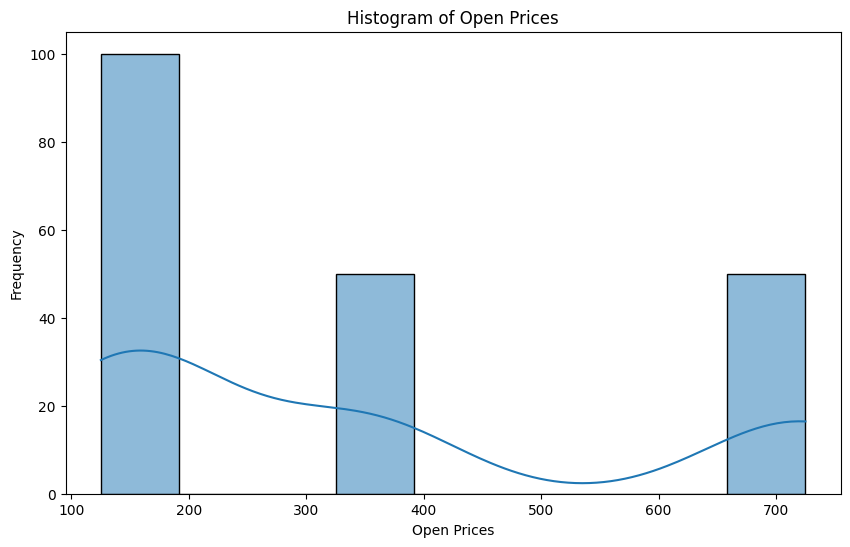

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/cleaned_stock_market_dataset.csv"
df = pd.read_csv(file_path)

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Open'], kde=True)  # Replace 'Open' with your numerical column name
plt.title('Histogram of Open Prices')
plt.xlabel('Open Prices')
plt.ylabel('Frequency')
plt.show()




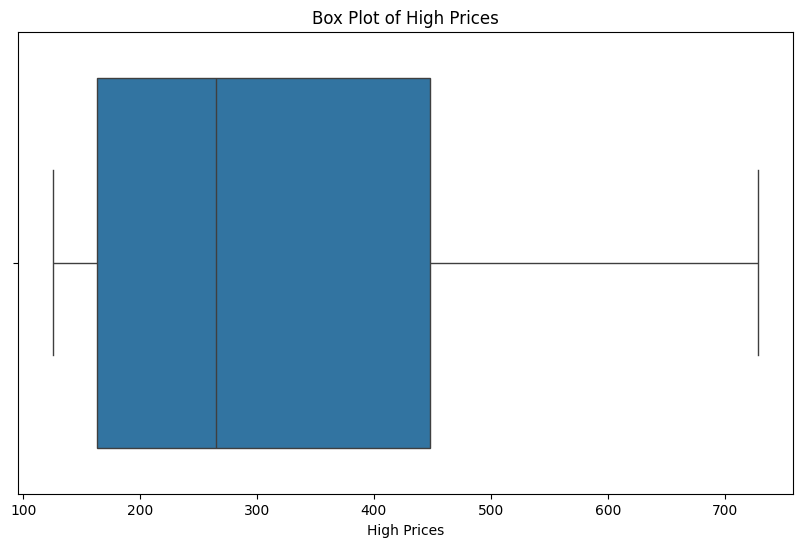

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['High'])  # Replace 'High' with your numerical column name
plt.title('Box Plot of High Prices')
plt.xlabel('High Prices')
plt.show()


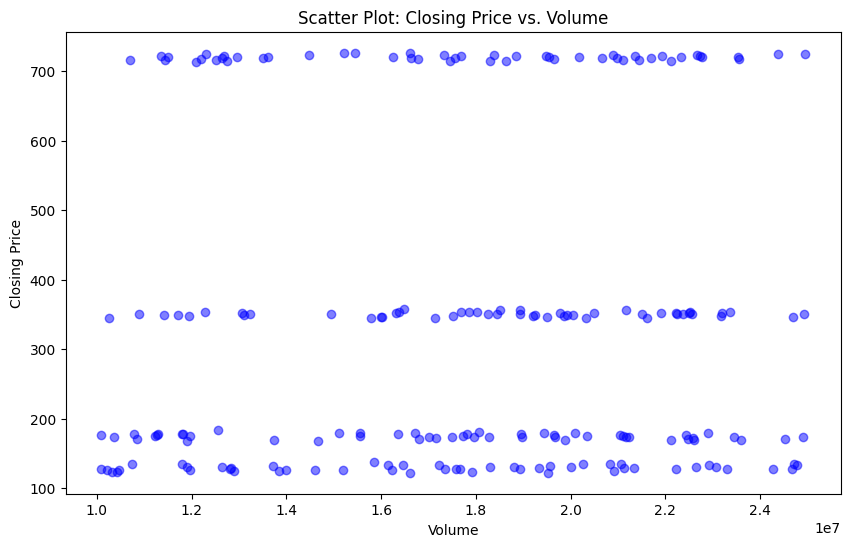

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock data
# Replace '/content/cleaned_stock_market_dataset.csv' with your actual file path or DataFrame
data = pd.read_csv('/content/cleaned_stock_market_dataset.csv')

# Assuming the dataset has 'Date', 'Close', and 'Volume' columns
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Ensure 'Date' is in datetime format and handle parsing errors

# Scatter plot: Closing Price vs. Volume
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Close'], alpha=0.5, color='blue')

# Adding labels and title
plt.title('Scatter Plot: Closing Price vs. Volume')
plt.xlabel('Volume')
plt.ylabel('Closing Price')

# Show the plot
plt.show()

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the stock data
# Replace '/content/cleaned_stock_market_dataset.csv' with your actual file path or DataFrame
data = pd.read_csv('/content/cleaned_stock_market_dataset.csv')

# Assuming the dataset has 'Date', 'Close', and 'Volume' columns
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Ensure 'Date' is in datetime format and handle parsing errors

# Pie chart: Distribution of a categorical variable (e.g., 'Sector' or any column in the dataset)
# Replace 'Sector' with the actual column name you want to visualize
if 'Sector' in data.columns:
    sector_counts = data['Sector'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=90)

    # Adding title
    plt.title('Sector Distribution')

    # Show the plot
    plt.show()
else:
    print("Column 'Sector' not found in the dataset. Please specify a valid column for the pie chart.")

Column 'Sector' not found in the dataset. Please specify a valid column for the pie chart.


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/cleaned_stock_market_dataset.csv"
df = pd.read_csv(file_path)

# Check the column names of the dataset to make sure 'Stock' exists
print(df.columns)

# Example: Plotting a bar chart for a specific column and its count
# Replace 'Stock' with an actual column name in your dataset
column_name = 'Stock'  # Replace this with the correct column name after checking

if column_name in df.columns:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=column_name)
    plt.title(f'{column_name} Distribution')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate labels for better visibility if needed
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{column_name}' does not exist in the dataset.")




Index(['Date', 'Stock Symbol', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Market Cap'],
      dtype='object')
Column 'Stock' does not exist in the dataset.
